In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest, getCountDFbyPrefix

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [2]:
# Read in the raw data sets to plot

df = pd.read_csv('../data/culture-conditions-bud-count-and-images/culture-conditions-bud-count-Rei.csv')
df.head()


,file name,bud_number,culture_condition,replicate_id
0,1_1_48h.JPG,14,FGF7_NRG1_ITS,1
1,1_2_48h.JPG,8,FGF7_NRG1_ITS,1
2,1_3_48h.JPG,10,FGF7_NRG1_ITS,1
3,1_4_48h.JPG,8,FGF7_NRG1_ITS,1
4,1_6_48h.JPG,8,FGF7_NRG1_ITS,1


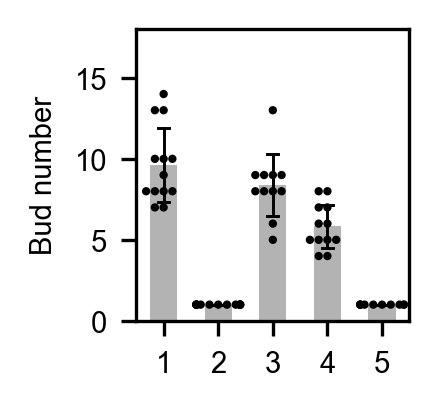

In [3]:
# Make plot for figure

fig_width, fig_height = 1.4, 1.2 # inches
line_width = .8
output_prefix = 'SMG-single-bud-culture-conditions'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.3, 0.14, 0.65, 0.81])

# palette_dict = {'sg-Control': 'black', 'sg1-Itgb1': 'blue', 'sg2-Itgb1': 'red'}
plotting_order = ['FGF7_NRG1_ITS', 'NRG1_ITS', 'FGF7_ITS', 'FGF7', 'medium_only']

sns.swarmplot(data = df,
              x = 'culture_condition', y = 'bud_number',
              size = 2,
              # hue = 'replicate_id',
              color = 'k',
              order = plotting_order,
#               alpha = .5,
#               palette = palette_dict,
             )
sns.barplot(data = df,
            x = 'culture_condition', y = 'bud_number',
            order = plotting_order,
            color=".7", # This a nicer looking lighter gray to my own taste
            errwidth=.7, errcolor="k", capsize=.2, ci='sd')

change_bar_width(ax, .5)

y_max = 18
plt.ylim([0,y_max])

# rotate and customize x tick labels if necessary
x_labels = [1, 2, 3, 4, 5]
ax.set_xticklabels(labels=x_labels)
# x_labels = ax.get_xticklabels()
# ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

plt.xlabel("")
plt.ylabel("Bud number")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)

In [4]:
tukeyTest(df.bud_number, df.culture_condition)

Summary of test:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
         FGF7      FGF7_ITS   2.5303 0.0018   0.7425  4.3181   True
         FGF7 FGF7_NRG1_ITS   3.7821  0.001   2.0675  5.4966   True
         FGF7      NRG1_ITS  -4.8333  0.001  -6.4921 -3.1746   True
         FGF7   medium_only  -4.8333  0.001  -6.6671 -2.9995   True
     FGF7_ITS FGF7_NRG1_ITS   1.2517 0.2744  -0.5028  3.0063  False
     FGF7_ITS      NRG1_ITS  -7.3636  0.001  -9.0637 -5.6635   True
     FGF7_ITS   medium_only  -7.3636  0.001  -9.2349 -5.4923   True
FGF7_NRG1_ITS      NRG1_ITS  -8.6154  0.001 -10.2383 -6.9925   True
FGF7_NRG1_ITS   medium_only  -8.6154  0.001 -10.4168 -6.8139   True
     NRG1_ITS   medium_only      0.0    0.9  -1.7485  1.7485  False
-------------------------------------------------------------------
p values of all pair-wise test

In [5]:
for i in df.culture_condition.unique():
    print(i, 'n=', len(df[df.culture_condition==i]))

FGF7_NRG1_ITS n= 13
FGF7_ITS n= 11
NRG1_ITS n= 15
FGF7 n= 12
medium_only n= 10
